In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Files/1.01.SimpleLinearRegression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
#First regression
# y = bo(constant - min wage) + b1(slope - salary increase)x1 (var ind - years of ex)
# y = bo + b1x1
y = data['GPA']
x1 = data['SAT']

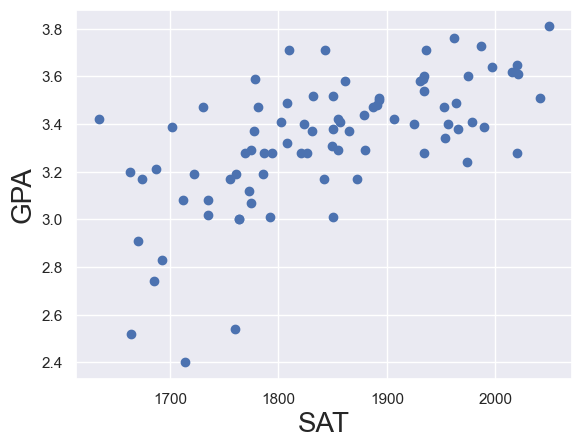

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit() #fit() will apply a specific estimation technique (OLS) to obtain the fit of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           7.20e-11
Time:                        13:37:45   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

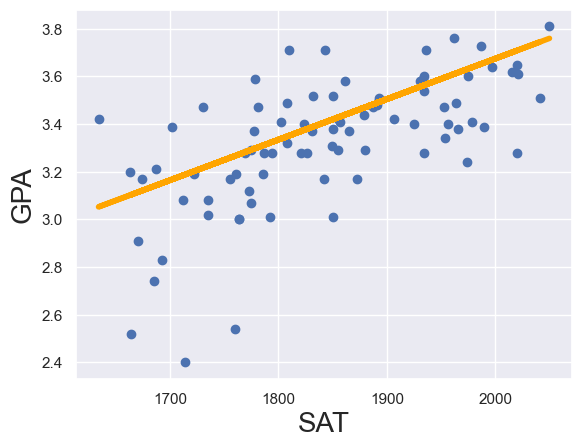

In [8]:
plt.scatter(x1,y)
yhat = 0.275 +0.0017 * x1 # b0 = constan, b1=SAT (var)
fig = plt.plot(x1,yhat,lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

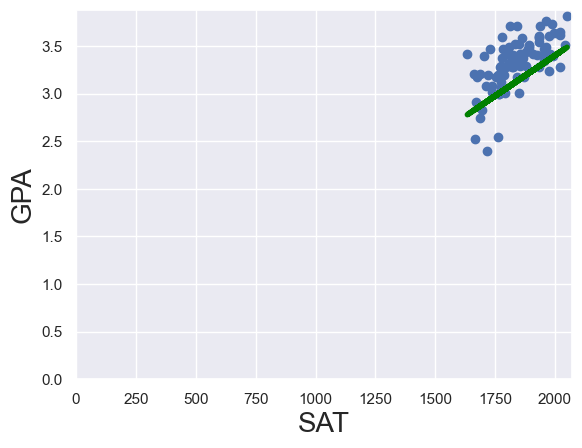

In [9]:
#        coef	std err	  t	     P>|t|	[0.025	0.975]
#const	0.2750	0.409	0.673	0.503	-0.538	1.088
# ----------------><-----------------------
#const = b0
# std err --> min error more aquarate is the analysis
# t	  and   P>|t| --> Indicates a hyphotesis involved here H0: B=0 it means is the coefficiente == 0?????
#if B0 = 0 then the line crosses the y axis at the origin 
#Let's see 

plt.scatter(x1,y)
yhat = 0 +0.0017 * x1 # b0 = constan, b1=SAT (var)
fig = plt.plot(x1,yhat,lw=4, c='green', label = 'regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.xlim(0)
plt.ylim(0)
plt.show()

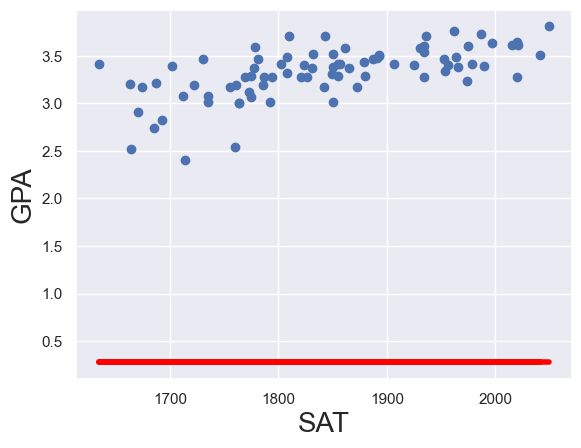

In [12]:
#B1 = 0 => yhat = B0 -->  y = bo(constante) + b1(slope))x1 (var ind)
#always goes to the interception value

plt.scatter(x1,y)
yhat = 0.275 + 0 * x1 # b0 = constan, b1=SAT (var)
fig = plt.plot(x1,yhat,lw=4, c='red', label = 'regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [13]:
# ask yourself --> Is this a useful variable????
# review the p-value < 0.005 means that variable is significant 
#P>|t| = 0.503 --> Not here, this is not esential, it is a causal relationship of the Xs we are interested in
#P>|t| = 0.000 --> Here it is	

In [15]:
#To find the predicted GPA for a student with an SAT score of 1850 using the regression table, 
#you'll use the regression equation:
# p-value >= 0.05 it means the constant is not very far from zero

#Predicted GPA = Intercept + (Coefficient of SAT Score) * (SAT score)
yhat = 0 + 0.0017*1850
yhat

3.145

In [16]:
#How to know there is a good regression
#1. Sum of squares total  = SST or TSS 
#2. Sum of squares regression = SSR or ESS --> if SST == SSR you got all the data interset and it is perfect
#3. sum pf squares error = SSE or RSS --> smallest the error better the estimation
# SST = SSR + SSE 
# Total variability = Explained variability + unexpected variability

In [ ]:
#Model = OLS Ordinary least squares
#Method = Least squares
#This method intents to find the line min with lowest error
# Finds the closest to all points 


In [17]:
#R^2 = SSR/SST --> explains the variability values between 0 and 1
# but realistic is between 0.2 and 0.9
#This is important to know if the regression model used is good or not
# R^2 = 0.406 This explains the 41% of the variability of the sample data
# This is not good of bad, but it is really far away from the 90% so probably we are missing important information
# Like gender, income, marital status
#SST = 1245, SSR = 945, SSE = 300. What is the R-squared of this regression?
r_square = 945/1245
r_square

0.7590361445783133